In [9]:
import os

print(len(os.listdir('../inputs/extra')))
print(len(os.listdir('../inputs/train')))
print(len(os.listdir('../inputs/test')))
print(len(os.listdir('../inputs/extra'))+len(os.listdir('../inputs/train'))+len(os.listdir('../inputs/test')))

202355
33404
11706
247465


In [10]:
def imShow(path):
    import cv2
    import matplotlib.pyplot as plt
    %matplotlib inline

    image = cv2.imread(path)
    height, width = image.shape[:2]
    resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

    fig = plt.gcf()
    fig.set_size_inches(18, 10)
    plt.axis("off")
#   plt.rcParams['figure.figsize'] = [10, 5]
    plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))

def imShowCv(image):
    import cv2
    import matplotlib.pyplot as plt
    %matplotlib inline

    height, width = image.shape[:2]
    resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

    fig = plt.gcf()
    fig.set_size_inches(18, 10)
    plt.axis("off")
    #plt.rcParams['figure.figsize'] = [10, 5]
    plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))

import json
with open('json.json') as f:
    dataTrain = json.load(f)
with open('digitStructExtra.json') as f:
    dataExtra = json.load(f)
with open('digitStructTest.json') as f:
    dataTest = json.load(f)
# print("dataTrain[0]",dataTrain[0])

for i in range(len(dataTrain)):
    dataTrain[i]['filename']='../inputs/train/'+dataTrain[i]['filename']
for i in range(len(dataExtra)):
    dataExtra[i]['filename']='../inputs/extra/'+dataExtra[i]['filename']
for i in range(len(dataTest)):
    dataTest[i]['filename']='../inputs/test/'+dataTest[i]['filename']

# print('dataExtra[255]',dataExtra[255])
# print('dataTest[242]',dataTest[242])

#IMPORTANT LINE THAT INCLUDES dataExtra to dataTrain
dataList = dataTrain +dataExtra
# print('len(dataList)',len(dataList))

#Uncomment this line to include the test set in dataList
dataList +=dataTest

# print('len(dataList)',len(dataList))
# print('len(dataTest)',len(dataTest))

In [11]:
n=0
for dataEntry in dataList:
    if(len(dataEntry['boxes'])==7):
        n+=1

# print(n)
  

33


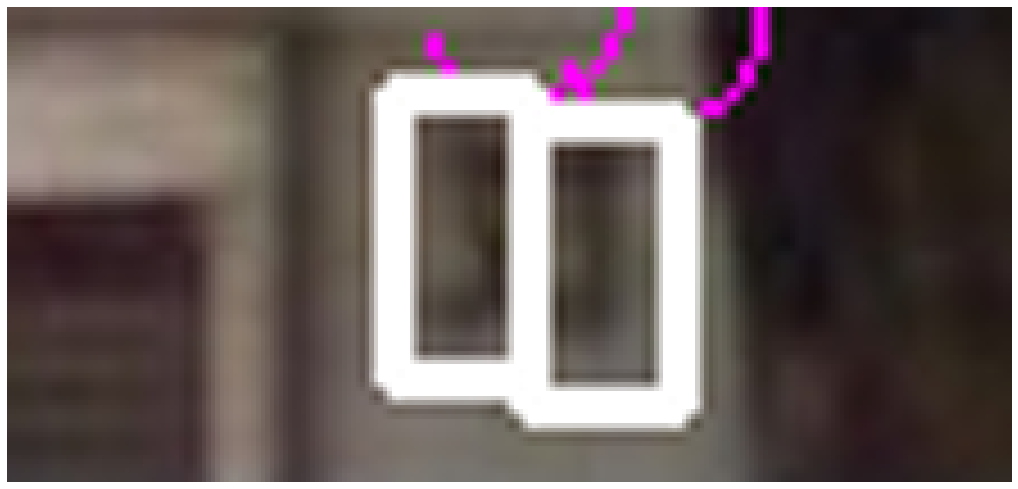

In [13]:
import cv2
lst = []
final_string = ''
# print(len(dataList))
# print(len(dataTest))

#input data
item = dataList[5]
# print(item)

image = cv2.imread(item['filename'])

for box in item['boxes']:
#     print(box)

    left = int(box['left'])
    top = int(box['top'])
    right = int(box['left'] + box['width'])
    bottom = int(box['top'] + box['height'])

    label = int(box['label'])
#     print('label',label)
    lst.append(label)

    #IF LABEL = 10, CHANGE IT TO ZERO
    if label == 10:
        label = 0
#     lst.append(label)
    
    cv2.putText(image,str(label),  (left, top), cv2.FONT_HERSHEY_SIMPLEX, 1,(255, 0, 255), 1)
    cv2.rectangle(image, (left, top), (right, bottom), (255, 255, 255), 2)

for final in lst:
    final_string = final_string + str(final)
imShowCv(image)
# print(lst)
print(final_string)

